# Assignment 2 - Diamonds Dataset - Yasemin Çıkıkçı

1. Import .csv data source to Python data frame and examine the data. (i.e. check data types, convert columns to other data types if necessary, get descriptive stats of the dataset, subset your data and eliminate columns that will not be included in the training) (20 points)

In [1]:
!pip install pydataset
import pydataset
df = pydataset.data('diamonds')
pydataset.data('diamonds', show_doc=True)

diamonds

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Prices of 50,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

### Usage

    data(diamonds)

### Format

A data frame with 53940 rows and 10 variables

### Details

  * price. price in US dollars (\$326–\$18,823) 

  * carat. weight of the diamond (0.2–5.01) 

  * cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal) 

  * colour. diamond colour, from J (worst) to D (best) 

  * clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best)) 

  * x. length in mm (0–10.74) 

  * y. width in mm (0–58.9) 

  * z. depth in mm (0–31.8) 

  * depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79) 

  * table. width of top of diamond relative to widest point (43–95) 




In [2]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Check data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Convert columns to other data types. (Object to category)

In [4]:
df[["cut","color","clarity"]] = df[["cut","color","clarity"]].astype("category")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


Get descriptive stats of the dataset

In [6]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [7]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [9]:
import pandas as pd
enc = OneHotEncoder(handle_unknown='ignore')
dummy = enc.fit_transform(df[["cut","color","clarity"]])
df_dummy = pd.DataFrame(dummy.toarray(),columns = enc.get_feature_names_out())
df_dummy.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
df_dummy.index = range(1, len(df) + 1)
df_dummy.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 1 to 53940
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut_Fair       53940 non-null  float64
 1   cut_Good       53940 non-null  float64
 2   cut_Ideal      53940 non-null  float64
 3   cut_Premium    53940 non-null  float64
 4   cut_Very Good  53940 non-null  float64
 5   color_D        53940 non-null  float64
 6   color_E        53940 non-null  float64
 7   color_F        53940 non-null  float64
 8   color_G        53940 non-null  float64
 9   color_H        53940 non-null  float64
 10  color_I        53940 non-null  float64
 11  color_J        53940 non-null  float64
 12  clarity_I1     53940 non-null  float64
 13  clarity_IF     53940 non-null  float64
 14  clarity_SI1    53940 non-null  float64
 15  clarity_SI2    53940 non-null  float64
 16  clarity_VS1    53940 non-null  float64
 17  clarity_VS2    53940 non-null  float64
 18  clarit

In [12]:
data = df[["carat","depth","table","price"]]
data = pd.merge(data, df_dummy, left_index=True, right_index=True, how="left")
data

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.21,59.8,61.0,326,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.23,56.9,65.0,327,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.29,62.4,58.0,334,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.31,63.3,58.0,335,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.72,63.1,55.0,2757,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.70,62.8,60.0,2757,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53939,0.86,61.0,58.0,2757,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


2. Load/import sklearn modules for model development. Find right classes/functions for Ordinary Least Squares Linear Regression, Decision Trees, Random Forest, and Gradient Boosted Tree algorithms. (20 points)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

3.Split your dataset in two parts as train and test. Train dataset will be used during model training phase. Test data will be used for out-of-sample testing after fitting the model. (20 points)

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((43152, 23), (10788, 23), (43152,), (10788,))

4.Predict test data with all models. Calculate MAPE, MAE, MSE, RMSE, R^2 values by using predicted and actual values of test data. Compare your results with previous step. (Hint: use metrics functions in sklearn metrics module) (20 points)

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

metrics_table = pd.DataFrame(columns=['MAPE', 'MAE', 'MSE', 'RMSE', 'R^2'])

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    metrics_table.loc[name] = [mape, mae, mse, rmse, r2]

print("Evaluation Metrics:")
print(metrics_table)

Evaluation Metrics:
                       MAPE         MAE           MSE         RMSE       R^2
Linear Regression  0.454758  801.559543  1.344704e+06  1159.613699  0.915411
Decision Tree      0.100727  351.016718  5.107007e+05   714.633257  0.967874
Random Forest      0.082717  282.533177  3.130347e+05   559.495013  0.980308
Gradient Boosting  0.134264  405.521407  5.353587e+05   731.682128  0.966323


Random Forest has highest R^2 value comparing to other models. Also it has smallest MAPE, MAE, MSE and RMSE values. So, Random Forest model is the best model for this dataset.

MAPE is the mean absolute percentage error.

MAE is the mean of the absolute value of the errors.

MSE is the mean of the squared errors.

RMSE is the square root of the mean of the squared errors.


5.Plot predicted values vs actual values and residuals vs actual values as two separate plots. (Hint: use seaborn scatterplot function) (20 points)

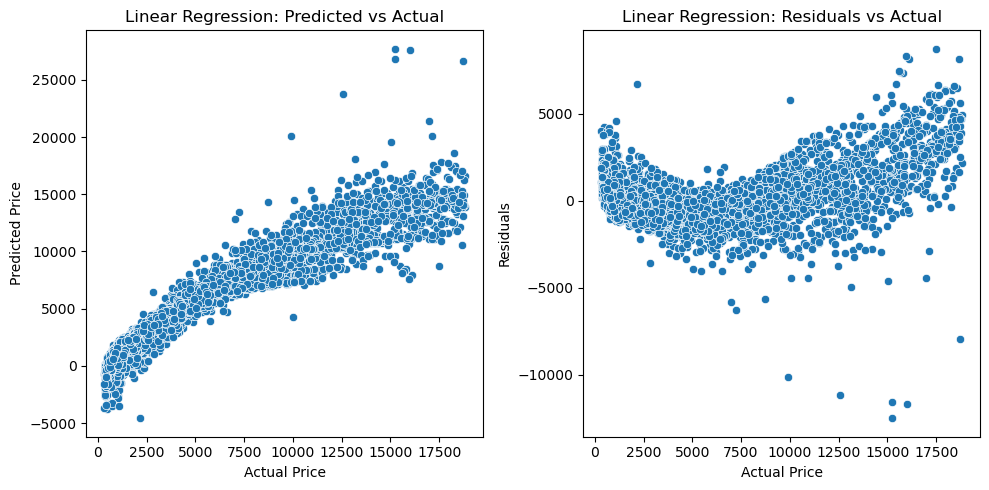

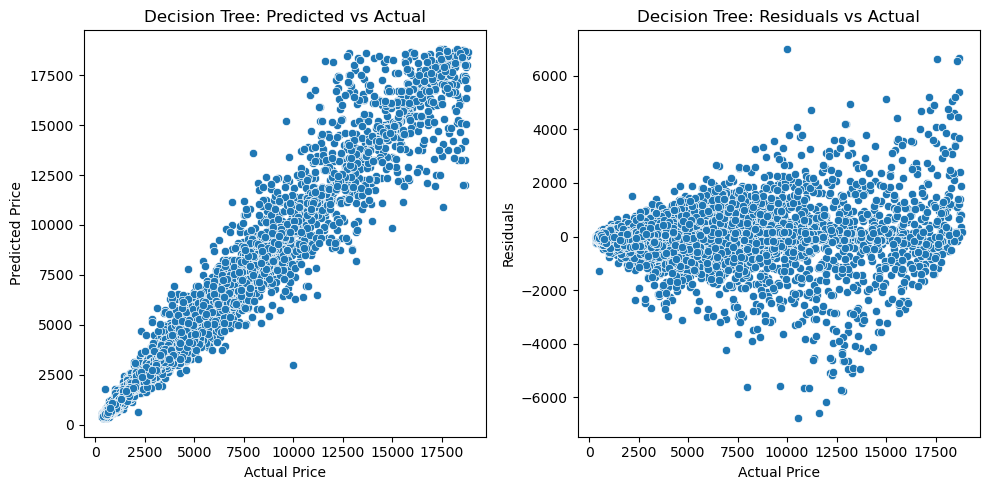

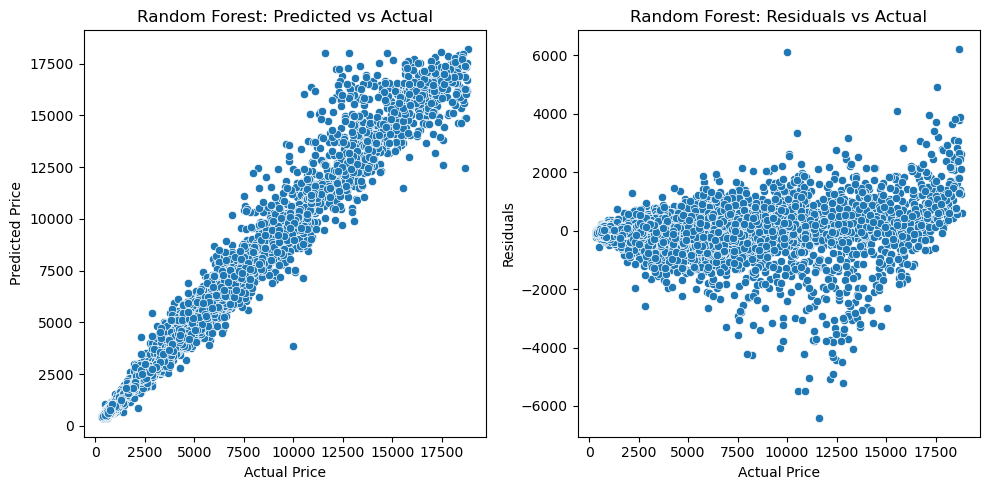

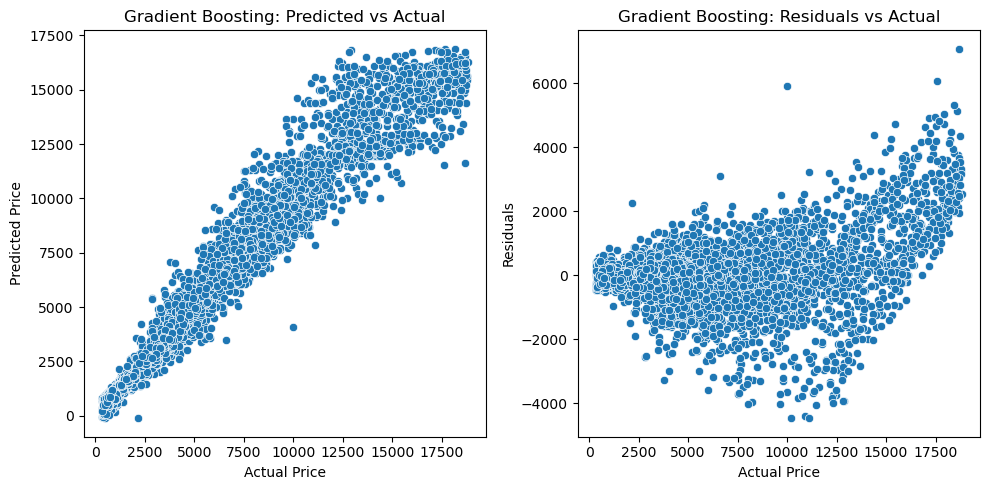

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'{name}: Predicted vs Actual')
    

    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.xlabel('Actual Price')
    plt.ylabel('Residuals')
    plt.title(f'{name}: Residuals vs Actual')
    
    plt.tight_layout()
    plt.show()

Random Forest model has nearest values to the actual values.